In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import timeit
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir("/content/drive/MyDrive/AI_VAR/LAB2/")

In [4]:
!pwd

/content/drive/MyDrive/AI_VAR/LAB2


In [5]:
pip install keras

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
def baseline_model(num_pixels, num_classes):

    #Application 1 - Step 5 - Initialize the sequential model
    model = Sequential()

    #TODO - Application 1 - Step 5 - build a standard feed-forward network with one dense hidden layer(with 8 neurons) and one dense output layer
    model.add(Dense(8, input_dim=num_pixels, kernel_initializer='normal', 
    activation='relu')) 
    model.add(Dense(num_classes, kernel_initializer='normal', 
    activation='softmax')) 

    #TODO - Application 1 - Step 6 - Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse']) 

    return model

In [8]:
def load_fun(X_train, Y_train, X_test, Y_test):

  #TODO - Application 1 - Step 2 - Transform the images to 1D vectors of floats (28x28 pixels  to  784 elements)
  num_pixels = X_train.shape[1] * X_train.shape[2] 
  X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32') 
  X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

  #TODO - Application 1 - Step 3 - Normalize the input values
  X_train = X_train / 255 
  X_test = X_test / 255 

  #TODO - Application 1 - Step 4 - Transform the classes labels into a binary matrix
  Y_train = np_utils.to_categorical(Y_train) 
  Y_test = np_utils.to_categorical(Y_test) 
  num_classes = Y_test.shape[1]  

  model = baseline_model(num_pixels, num_classes)
  
  model.load_weights("my_model_weights.h5")

  Y_pred = model.predict(X_test)
  Y_pred = np.argmax(Y_pred, axis=1)

  return Y_pred

In [9]:
Y_pred = load_fun(X_train, Y_train, X_test, Y_test)

In [10]:
print("Y_pred: ", Y_pred)
print("Y_test: ", Y_test)

Y_pred:  [7 2 1 ... 4 5 6]
Y_test:  [7 2 1 ... 4 5 6]


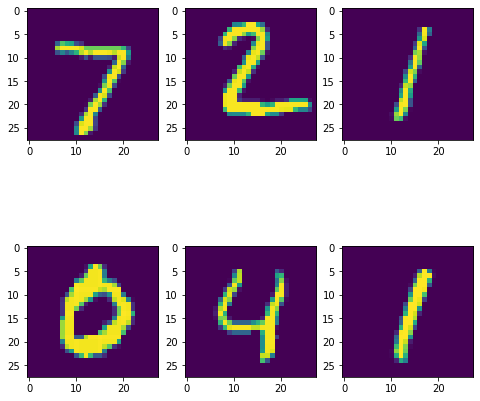

In [11]:
%matplotlib inline 
fig=plt.figure(figsize=(8, 8))
col = 3
row = 2
for i in range(1, col*row +1):
    img = X_test[i-1]
    fig.add_subplot(row, col, i)
    plt.imshow(img)
plt.show()